In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary
from torchsummary import summary
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
from torchvision.utils import save_image
import os
%load_ext autoreload
%autoreload 2

In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
%cd "/content/gdrive/My Drive/Colab Notebooks/CNN_Utility"

/content/gdrive/My Drive/Colab Notebooks/CNN_Utility


In [0]:
from dataloaders import train_test_dataloaders,AlbumentationWrapper
from models import model_params,model_params,Assignment11
from graphs_and_other_utility_functions import plot,save_model,get_lr,plot_misclassified_gradcam_images,plotLRFinder
from train_test import train,test

In [0]:
train_transforms , test_transforms=AlbumentationWrapper('train'), AlbumentationWrapper('test')

In [7]:
trainloader, testloader = train_test_dataloaders(1, 512, 10, train_transforms , test_transforms)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/98 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

Loss=3.0882041454315186 Batch_id=97 le=0.0 Accuracy=9.37: 100%|██████████| 98/98 [00:24<00:00,  3.95it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 1 LR: 0.005 


Loss=2.7386817932128906 Batch_id=97 le=0.005 Accuracy=13.31: 100%|██████████| 98/98 [00:24<00:00,  4.05it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 2 LR: 0.02 


Loss=2.361146926879883 Batch_id=97 le=0.02 Accuracy=15.73: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 3 LR: 0.045 


Loss=1.938576102256775 Batch_id=97 le=0.045 Accuracy=24.06: 100%|██████████| 98/98 [00:24<00:00,  4.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 4 LR: 0.08 


Loss=1.6209664344787598 Batch_id=97 le=0.08 Accuracy=36.61: 100%|██████████| 98/98 [00:24<00:00,  3.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 5 LR: 0.125 


Loss=1.4190750122070312 Batch_id=97 le=0.125 Accuracy=48.30: 100%|██████████| 98/98 [00:24<00:00,  3.97it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 6 LR: 0.18 


Loss=1.1275664567947388 Batch_id=97 le=0.18 Accuracy=59.08: 100%|██████████| 98/98 [00:24<00:00,  3.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 7 LR: 0.245 


Loss=0.6621876955032349 Batch_id=97 le=0.245 Accuracy=68.26: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 8 LR: 0.32 


Loss=0.6395236849784851 Batch_id=97 le=0.32 Accuracy=74.03: 100%|██████████| 98/98 [00:25<00:00,  3.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 9 LR: 0.405 


Loss=0.7472113966941833 Batch_id=97 le=0.405 Accuracy=78.16: 100%|██████████| 98/98 [00:25<00:00,  3.87it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 10 LR: 0.5 


Loss=0.6133944392204285 Batch_id=97 le=0.5 Accuracy=79.66: 100%|██████████| 98/98 [00:25<00:00,  3.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 11 LR: 0.605 


Loss=0.4822869598865509 Batch_id=97 le=0.605 Accuracy=80.43: 100%|██████████| 98/98 [00:25<00:00,  3.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 12 LR: 0.72 


Loss=0.507925808429718 Batch_id=97 le=0.72 Accuracy=81.33: 100%|██████████| 98/98 [00:25<00:00,  3.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 13 LR: 0.845 


Loss=0.4581860601902008 Batch_id=97 le=0.845 Accuracy=81.37: 100%|██████████| 98/98 [00:24<00:00,  3.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 14 LR: 0.98 


Loss=0.559247612953186 Batch_id=97 le=0.98 Accuracy=82.00: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 15 LR: 1.125 


Loss=3.8402113914489746 Batch_id=97 le=1.125 Accuracy=40.64: 100%|██████████| 98/98 [00:24<00:00,  3.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 16 LR: 1.28 


Loss=2.302586078643799 Batch_id=97 le=1.28 Accuracy=10.35: 100%|██████████| 98/98 [00:24<00:00,  4.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 17 LR: 1.445 


Loss=2.302586078643799 Batch_id=97 le=1.445 Accuracy=10.00: 100%|██████████| 98/98 [00:24<00:00,  3.97it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 18 LR: 1.62 


Loss=2.302586078643799 Batch_id=97 le=1.62 Accuracy=10.00: 100%|██████████| 98/98 [00:24<00:00,  3.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


EPOCH: 19 LR: 1.805 


Loss=2.302586078643799 Batch_id=97 le=1.805 Accuracy=10.00: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]


1960


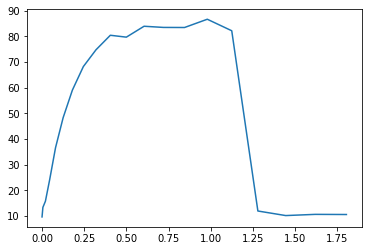

In [8]:
model =  Assignment11().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)
#lmbda = lambda epoch: epoch//2
lmbda = lambda epoch: (epoch**2)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer,lr_lambda=lmbda)
epochs=20
input_size=(3,32,32)

train_losses_without_L1_L2 = []
test_losses_without_L1_L2 = []
train_acc_without_L1_L2 = []
test_acc_without_L1_L2 = []
best_loss = 1000.0
misclassified_list = {}
lr=[]
model_params(model, input_size,device)  

for epoch in range(epochs):
    lr.append(get_lr(optimizer))
    print("\nEPOCH: %s LR: %s " % (epoch, get_lr(optimizer)))
    best_loss=train(model, device, trainloader, optimizer, scheduler, epoch, False, train_acc_without_L1_L2, train_losses_without_L1_L2, best_loss,True)
    #test(model, device, testloader, test_acc_without_L1_L2, test_losses_without_L1_L2, misclassified_list)
    scheduler.step()

print(len(train_acc_without_L1_L2))
plotLRFinder(train_acc_without_L1_L2,lr,len(trainloader),epochs)

In [0]:
model =  Assignment11().to(device)
optimizer1 = optim.SGD(model.parameters(), lr=0.06, momentum=0.9, weight_decay=9e-4)
scheduler1 = torch.optim.lr_scheduler.OneCycleLR(optimizer1, max_lr=0.6, pct_start=0.21 , steps_per_epoch=len(trainloader), div_factor=10, cycle_momentum=False, epochs=24)
epochs=24
input_size=(3,32,32)

  0%|          | 0/98 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

Loss=2.255547046661377 Batch_id=97 le=0.11097622357626147 Accuracy=11.42: 100%|██████████| 98/98 [00:24<00:00,  3.93it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 1249/10000 (12.49%)

EPOCH: 1 LR: 0.11097622357626147 


Loss=2.142334222793579 Batch_id=97 le=0.24465618785988302 Accuracy=14.78: 100%|██████████| 98/98 [00:24<00:00,  3.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 1916/10000 (19.16%)

EPOCH: 2 LR: 0.24465618785988302 


Loss=1.736594796180725 Batch_id=97 le=0.41056211694724576 Accuracy=28.73: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 3594/10000 (35.94%)

EPOCH: 3 LR: 0.41056211694724576 


Loss=1.5912915468215942 Batch_id=97 le=0.5460476572547587 Accuracy=41.63: 100%|██████████| 98/98 [00:25<00:00,  3.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 4135/10000 (41.35%)

EPOCH: 4 LR: 0.5460476572547587 


Loss=1.326638102531433 Batch_id=97 le=0.5999532443819302 Accuracy=50.36: 100%|██████████| 98/98 [00:25<00:00,  3.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 3754/10000 (37.54%)

EPOCH: 5 LR: 0.5999532443819302 


Loss=1.1137460470199585 Batch_id=97 le=0.5961318733466785 Accuracy=59.23: 100%|██████████| 98/98 [00:25<00:00,  3.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 5729/10000 (57.29%)

EPOCH: 6 LR: 0.5961318733466785 


Loss=1.011527419090271 Batch_id=97 le=0.5841557384611794 Accuracy=66.78: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 5606/10000 (56.06%)

EPOCH: 7 LR: 0.5841557384611794 


Loss=0.9165056347846985 Batch_id=97 le=0.5643959936276929 Accuracy=70.86: 100%|██████████| 98/98 [00:24<00:00,  3.93it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 6031/10000 (60.31%)

EPOCH: 8 LR: 0.5643959936276929 


Loss=0.7031872868537903 Batch_id=97 le=0.5373939046009972 Accuracy=72.66: 100%|██████████| 98/98 [00:25<00:00,  3.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 6532/10000 (65.32%)

EPOCH: 9 LR: 0.5373939046009972 


Loss=0.673022449016571 Batch_id=97 le=0.5038891219292551 Accuracy=74.28: 100%|██████████| 98/98 [00:24<00:00,  3.93it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 5877/10000 (58.77%)

EPOCH: 10 LR: 0.5038891219292551 


Loss=0.7894970178604126 Batch_id=97 le=0.4647994201907484 Accuracy=75.57: 100%|██████████| 98/98 [00:25<00:00,  3.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 5730/10000 (57.30%)

EPOCH: 11 LR: 0.4647994201907484 


Loss=0.6327124834060669 Batch_id=97 le=0.42119555799566494 Accuracy=76.65: 100%|██████████| 98/98 [00:25<00:00,  3.91it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 7025/10000 (70.25%)

EPOCH: 12 LR: 0.42119555799566494 


Loss=0.5235019326210022 Batch_id=97 le=0.37427194739644637 Accuracy=78.26: 100%|██████████| 98/98 [00:25<00:00,  3.91it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 7219/10000 (72.19%)

EPOCH: 13 LR: 0.37427194739644637 


Loss=0.585253894329071 Batch_id=97 le=0.3253139361403412 Accuracy=79.88: 100%|██████████| 98/98 [00:25<00:00,  3.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 6700/10000 (67.00%)

EPOCH: 14 LR: 0.3253139361403412 


Loss=0.521266520023346 Batch_id=97 le=0.2756625989799997 Accuracy=81.60: 100%|██████████| 98/98 [00:25<00:00,  3.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 7812/10000 (78.12%)

EPOCH: 15 LR: 0.2756625989799997 


Loss=0.4952659606933594 Batch_id=97 le=0.22667800249069053 Accuracy=83.36: 100%|██████████| 98/98 [00:24<00:00,  3.95it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8319/10000 (83.19%)

EPOCH: 16 LR: 0.22667800249069053 


Loss=0.3650209307670593 Batch_id=97 le=0.17970194965695332 Accuracy=84.82: 100%|██████████| 98/98 [00:24<00:00,  3.95it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 7706/10000 (77.06%)

EPOCH: 17 LR: 0.17970194965695332 


Loss=0.4604959487915039 Batch_id=97 le=0.1360212247418364 Accuracy=86.60: 100%|██████████| 98/98 [00:24<00:00,  3.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8307/10000 (83.07%)

EPOCH: 18 LR: 0.1360212247418364 


Loss=0.32472309470176697 Batch_id=97 le=0.09683234524795399 Accuracy=88.42: 100%|██████████| 98/98 [00:24<00:00,  3.96it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8663/10000 (86.63%)

EPOCH: 19 LR: 0.09683234524795399 


Loss=0.3498010039329529 Batch_id=97 le=0.0632087864968215 Accuracy=90.03: 100%|██████████| 98/98 [00:24<00:00,  3.93it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8839/10000 (88.39%)

EPOCH: 20 LR: 0.0632087864968215 


Loss=0.1559736430644989 Batch_id=97 le=0.03607157662210867 Accuracy=91.94: 100%|██████████| 98/98 [00:24<00:00,  3.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8978/10000 (89.78%)

EPOCH: 21 LR: 0.03607157662210867 


Loss=0.1741773784160614 Batch_id=97 le=0.016164067448912595 Accuracy=93.17: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0005, Accuracy: 9069/10000 (90.69%)

EPOCH: 22 LR: 0.016164067448912595 


Loss=0.16128431260585785 Batch_id=97 le=0.004031572343837746 Accuracy=94.42: 100%|██████████| 98/98 [00:24<00:00,  3.95it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0005, Accuracy: 9111/10000 (91.11%)

EPOCH: 23 LR: 0.004031572343837746 


Loss=0.1499626785516739 Batch_id=97 le=6.428802926464275e-06 Accuracy=94.90: 100%|██████████| 98/98 [00:25<00:00,  3.91it/s]



Test set: Average loss: 0.0005, Accuracy: 9124/10000 (91.24%)



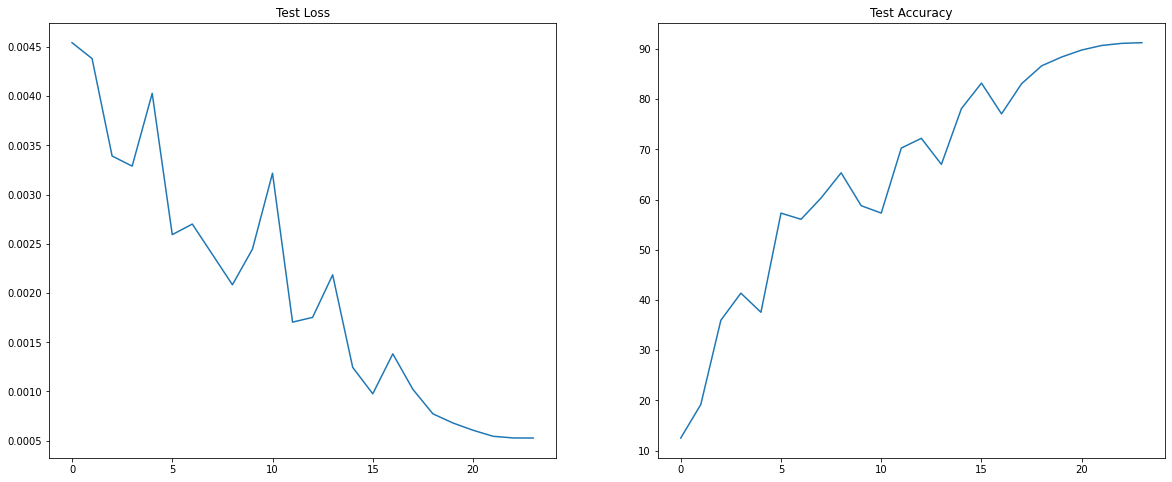

In [10]:
train_losses_without_L1_L2 = []
test_losses_without_L1_L2 = []
train_acc_without_L1_L2 = []
test_acc_without_L1_L2 = []
best_loss = 1000.0
misclassified_list = {}
model_params(model, input_size,device)  

for epoch in range(epochs):
    print("EPOCH: %s LR: %s " % (epoch, get_lr(optimizer1)))
    best_loss=train(model, device, trainloader, optimizer1, scheduler1, epoch, False, train_acc_without_L1_L2, train_losses_without_L1_L2, best_loss, False)
    test(model, device, testloader, test_acc_without_L1_L2, test_losses_without_L1_L2, misclassified_list)
    #scheduler.step()
plot(train_losses_without_L1_L2,train_acc_without_L1_L2, test_losses_without_L1_L2, test_acc_without_L1_L2, 'without L1 and L2')